In [14]:
import urllib
import json
import flask
import numpy as np
from waitress import serve
from grpc.beta import implementations
import tensorflow as tf
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2

from google.protobuf.json_format import MessageToJson
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
host = "172.54.247.185"
port = 9000
model_name = "mnist"
channel = implementations.insecure_channel(host, int(port))  
stub = prediction_service_pb2.beta_create_PredictionService_stub(channel)
request = predict_pb2.PredictRequest()
request.model_spec.name = "mnist"
request.model_spec.signature_name = 'predict_images'




In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
number = mnist.test.next_batch(1)[0]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


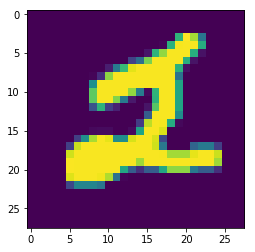

In [17]:

plt.imshow(number.reshape(28,28))

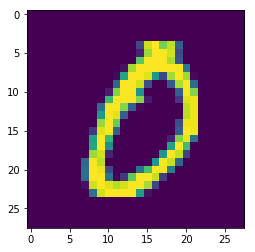

In [18]:
image, label = mnist.test.next_batch(1)
plt.imshow(image.reshape(28,28))

In [19]:
request.inputs['images'].CopyFrom(tf.contrib.util.make_tensor_proto(image[0], shape=[1, image[0].size]))
result = stub.Predict(request, 10.0)

In [20]:
jsonresult = MessageToJson(result)
finalresult = json.loads(jsonresult)
final = np.array(finalresult["outputs"]["scores"]["floatVal"])
prediction = np.argmax(final)
print(prediction)

0
